# Bereinigung der Datensätze

## 1. Importieren der Pakete

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf 



## 2. Kundendaten

### 2.1 Kundendatei einlesen

In [143]:
kunden = pd.read_csv("kunden.csv", decimal = '.', sep = ";")
kunden.head()

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.0,88160.31,1.0,43.0,K0310
1,54,77644.0,103145.70,1.0,40.0,K1042
2,55,44341.0,80565.16,0.0,37.0,K0382
3,49,67271.0,83949.89,0.0,42.0,K0498
4,46,49832.0,93781.58,0.0,41.0,K0552


### 2.2 Überblick über Datentypen

In [144]:
kunden.dtypes

Alter           int64
Einkommen     float64
Preis         float64
Geschlecht    float64
Zeit          float64
KundeNr        object
dtype: object

### 2.3. Bereinigung

### 2.3.1 Fehlende Datenpunkte ermitteln und ersetzen

In [145]:
kunden.isnull().sum()

Alter         0
Einkommen     0
Preis         0
Geschlecht    5
Zeit          0
KundeNr       0
dtype: int64

In [146]:
# Finden des Modalwertes:

In [147]:
modalwert_kunden = kunden['Geschlecht'].mode()[0]

In [148]:
modalwert_kunden

1.0

In [149]:
# Ersetzen der 5 fehlenden Geschlechtseinträge mit dem Modalwert 1.0

In [150]:
kunden.fillna(value = modalwert_kunden, axis = 0, inplace = True)

In [151]:
# Überprüfung

In [152]:
kunden.isnull().sum()

Alter         0
Einkommen     0
Preis         0
Geschlecht    0
Zeit          0
KundeNr       0
dtype: int64

### 2.3.2 Ausreißer ermitteln und entfernen

In [153]:
# Außreißer ermitteln
kunden.describe().T

,count,mean,std,min,25%,50%,75%,max
Alter,1104.0,50.481884,1.222506e+01,30.000000,40.0000,51.000,61.000,1.200000e+02
Einkommen,1104.0,964474.817596,3.009470e+07,-62840.374523,46638.5000,59013.000,70298.000,1.000000e+09
Preis,1104.0,88975.198714,2.446407e+04,21471.650000,70609.4225,88931.455,107093.375,1.654823e+05
Geschlecht,1104.0,0.639493,4.803653e-01,0.000000,0.0000,1.000,1.000,1.000000e+00
Zeit,1104.0,44.375906,1.084804e+01,12.000000,37.0000,44.000,52.000,8.000000e+01


### 2.3.2.1 Alter 

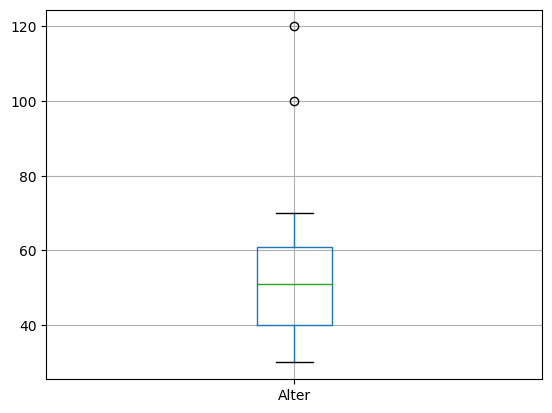

In [154]:
boxplot_alter = kunden.boxplot(column = 'Alter')
plt.show()

In [155]:
# zwei Ausreißer zu erkennen

In [156]:
# Berechnung von Q1, Q3 und IQR
Q1_Alter = kunden['Alter'].quantile(0.25)
Q3_Alter = kunden['Alter'].quantile(0.75)
IQR_Alter = Q3_Alter - Q1_Alter
# Berechnung der Ausreißer-Grenzen
untere_grenze_Alter = Q1_Alter - 1.5 * IQR_Alter
obere_grenze_Alter = Q3_Alter + 1.5 * IQR_Alter
kunden['Ausreißer'] = (kunden['Alter'] < untere_grenze_Alter) | (kunden['Alter'] > obere_grenze_Alter)
ausreißer_alter = kunden.Ausreißer.value_counts()
ausreißer_alter

False    1102
True        2
Name: Ausreißer, dtype: int64

In [157]:
# Ermitteln der genauen Werte der Ausreißer

In [158]:
kunden.loc[kunden['Ausreißer'] == True]

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Ausreißer
142,100,88749.0,119134.23,0.0,64.0,K0494,True
711,120,61857.0,104214.07,1.0,52.0,K0039,True


In [159]:
# Personen im Alter von 100 und 120 Jahren werden kein Auto mehr kaufen

In [160]:
# Ersetzen der Ausreißer in der Alters-Spalte durch Medianwert
alter_median = kunden['Alter'].median()
kunden.replace([120, 100], alter_median, inplace=True)

In [161]:
# Überprüfen ob noch Ausreißer vorhanden sind
kunden['Ausreißer'] = (kunden['Alter'] < untere_grenze_Alter) | (kunden['Alter'] > obere_grenze_Alter)
ausreißer_alter = kunden.Ausreißer.value_counts()
ausreißer_alter

False    1104
Name: Ausreißer, dtype: int64

In [162]:
# keine Ausreißer mehr vorhanden

## 2.3.2.2 Einkommen 

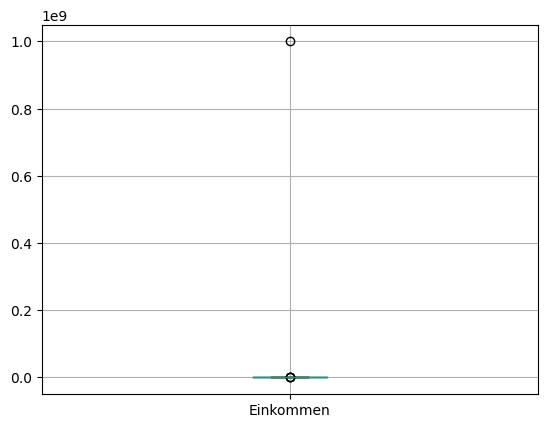

In [163]:
boxplot_einkommen = kunden.boxplot(column = 'Einkommen')
plt.show()

In [164]:
# 4 Ausreißer (aufgrund der Skalierung schwer zu erkennen)

In [165]:
# Berechnung von Q1, Q3 und IQR der Einkommens-Spalte
Q1_einkommen = kunden['Einkommen'].quantile(0.25)
Q3_einkommen = kunden['Einkommen'].quantile(0.75)
IQR_einkommen = Q3_einkommen - Q1_einkommen
IQR_einkommen
untere_grenze_einkommen = Q1_einkommen - 1.5 * IQR_einkommen
obere_grenze_einkommen = Q3_einkommen + 1.5 * IQR_einkommen
kunden['Ausreißer'] = (kunden['Einkommen'] < untere_grenze_einkommen) | (kunden['Einkommen'] > obere_grenze_einkommen)
ausreißer_einkommen = kunden.Ausreißer.value_counts()
ausreißer_einkommen

False    1100
True        4
Name: Ausreißer, dtype: int64

In [166]:
# Ermitteln der genauen Werte der Ausreißer
kunden.loc[kunden['Ausreißer'] == True]

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Ausreißer
408,68,1.000000e+09,87209.72,0.0,52.0,K0701,True
834,68,1.076890e+05,165482.31,1.0,60.0,K0415,True
966,69,0.000000e+00,125140.05,1.0,65.0,K1021,True
1082,59,-6.284037e+04,92837.59,0.0,46.0,K1083,True


In [167]:
# Ersetzen der Ausreißer in der Einkommens-Spalte durch Medianwert
einkommen_median = kunden['Einkommen'].median()
kunden.replace({'Einkommen': [1.000000e+09, 1.076890e+05, 0.000000e+00, -62840.374523]}, einkommen_median, inplace=True)

In [168]:
# Überprüfen ob noch Ausreißer vorhanden sind
kunden['Ausreißer'] = (kunden['Einkommen'] < untere_grenze_einkommen) | (kunden['Einkommen'] > obere_grenze_einkommen)
ausreißer_einkommen = kunden.Ausreißer.value_counts()
ausreißer_einkommen

False    1104
Name: Ausreißer, dtype: int64

In [169]:
# keine Ausreißer mehr vorhanden

### 2.3.2.3 Preis

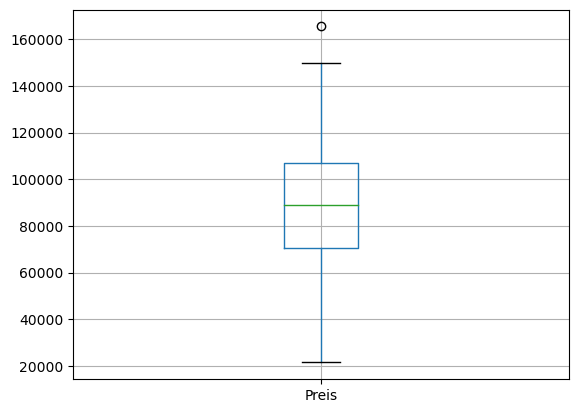

In [170]:
boxplot_preis = kunden.boxplot(column = 'Preis')
plt.show()

In [171]:
# ein Ausreißer zu erkennen

In [172]:
Q1_preis = kunden['Preis'].quantile(0.25)
Q3_preis = kunden['Preis'].quantile(0.75)
IQR_preis = Q3_preis - Q1_preis
IQR_preis
untere_grenze_preis = Q1_preis - 1.5 * IQR_preis
obere_grenze_preis = Q3_preis + 1.5 * IQR_preis
kunden['Ausreißer'] = (kunden['Preis'] < untere_grenze_preis) | (kunden['Preis'] > obere_grenze_preis)
ausreißer_preis = kunden.Ausreißer.value_counts()
ausreißer_preis

False    1103
True        1
Name: Ausreißer, dtype: int64

In [173]:
# Ermitteln der genauen Werte der Ausreißer
kunden.loc[kunden['Ausreißer'] == True]

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Ausreißer
834,68,59013.0,165482.31,1.0,60.0,K0415,True


In [174]:
# bei einem Einkommen von 59.013 ist es überraschend sich ein Auto im Preis von 165.482,31 zu kaufen, aber möglich, daher wird der Wert behalten


### 2.3.2.4 Zeit

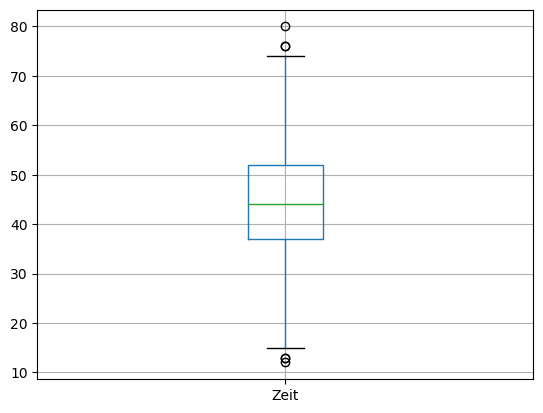

In [175]:
boxplot_preis = kunden.boxplot(column = 'Zeit')
plt.show()

In [176]:
# mehrere Ausreißer zu erkennen

In [177]:
# Berechnung von Q1, Q3 und IQR der Zeit-Spalte
Q1_zeit = kunden['Zeit'].quantile(0.25)
Q3_zeit = kunden['Zeit'].quantile(0.75)
IQR_zeit = Q3_zeit - Q1_zeit
IQR_zeit
untere_grenze_zeit = Q1_zeit - 1.5 * IQR_zeit
obere_grenze_zeit = Q3_zeit + 1.5 * IQR_zeit
kunden['Ausreißer'] = (kunden['Zeit'] < untere_grenze_zeit) | (kunden['Zeit'] > obere_grenze_zeit)
ausreißer_zeit = kunden.Ausreißer.value_counts()
ausreißer_zeit

False    1098
True        6
Name: Ausreißer, dtype: int64

In [178]:
# Ermittlung der genauen Werte der Ausreißer
kunden.loc[kunden['Ausreißer'] == True]

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Ausreißer
218,33,38675.0,56493.40,1.0,13.0,K0983,True
313,62,96569.0,140745.65,0.0,80.0,K0249,True
327,34,24811.0,57541.73,1.0,12.0,K0395,True
542,67,89170.0,123408.48,1.0,76.0,K1093,True
553,38,33666.0,50494.07,1.0,13.0,K0384,True
805,64,91409.0,140161.07,1.0,76.0,K0897,True


In [179]:
# Die Zeiten sind möglich, z.B. 12 Minuten weil keine Probefahrt gemacht wurde oder 80 Minuten weil eine lange gemacht wurde, Werte bleiben erhalten

In [180]:
kunden

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Ausreißer
0,64,66894.0,88160.31,1.0,43.0,K0310,False
1,54,77644.0,103145.70,1.0,40.0,K1042,False
2,55,44341.0,80565.16,0.0,37.0,K0382,False
3,49,67271.0,83949.89,0.0,42.0,K0498,False
4,46,49832.0,93781.58,0.0,41.0,K0552,False
...,...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467,False
1100,38,48301.0,64230.98,1.0,33.0,K0122,False
1101,67,63547.0,103123.57,1.0,41.0,K1045,False
1102,37,32686.0,49215.87,1.0,36.0,K1096,False


In [181]:
# Boolean-Spalte wieder entfernen
kunden = kunden.drop(kunden.columns[-1], axis=1)
kunden

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.0,88160.31,1.0,43.0,K0310
1,54,77644.0,103145.70,1.0,40.0,K1042
2,55,44341.0,80565.16,0.0,37.0,K0382
3,49,67271.0,83949.89,0.0,42.0,K0498
4,46,49832.0,93781.58,0.0,41.0,K0552
...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467
1100,38,48301.0,64230.98,1.0,33.0,K0122
1101,67,63547.0,103123.57,1.0,41.0,K1045
1102,37,32686.0,49215.87,1.0,36.0,K1096


## 3. Besucherdaten

### 3.1 Besucherdatei einlesen

In [182]:
besucher = pd.read_csv("besucher.csv", decimal = '.', sep = ";")
besucher.head()

,Alter,Einkommen,Geschlecht,Zeit,KundeNr
0,30,"39919,0953348874",0,"29,0",K1814
1,41,"53430,67308587748",0,"27,0",K1544
2,64,"73163,2169267002",0,"32,0",K1945
3,41,"36761,482581315344",0,"44,0",K1825
4,35,"42684,33163178136",1,"33,0",K1144


### 3.2 Überblick über Datentypen

In [183]:
besucher.dtypes

Alter          int64
Einkommen     object
Geschlecht     int64
Zeit          object
KundeNr       object
dtype: object

In [184]:
# zum Vergleich: Kunden
kunden.dtypes

Alter           int64
Einkommen     float64
Preis         float64
Geschlecht    float64
Zeit          float64
KundeNr        object
dtype: object

In [185]:
# Alter = int, Einkommen = float (ändern bei besucher), Preis = float, Geschlecht = int (ändern bei kunden), Zeit = float (ändern bei besucher), KundeNr = object

### 3.3. Bereinigung

In [186]:
# vermutlich ist die Kommaschreibweise aus dem deutschen, während wir die Werte in der englischen Schreibweise mit einem Punkt, statt Komma benötigen

### 3.3.1 Bereinigung der Nachkommastellen und Umwandlung der dtypes

### 3.3.1.1 Einkommen

In [187]:
besucher["Einkommen"] = besucher["Einkommen"].str.replace(",",".")
besucher["Einkommen"] = pd.to_numeric(besucher["Einkommen"]) 
besucher["Einkommen"] = besucher["Einkommen"].round(0).astype("float64")
besucher

,Alter,Einkommen,Geschlecht,Zeit,KundeNr
0,30,39919.0,0,"29,0",K1814
1,41,53431.0,0,"27,0",K1544
2,64,73163.0,0,"32,0",K1945
3,41,36761.0,0,"44,0",K1825
4,35,42684.0,1,"33,0",K1144
...,...,...,...,...,...
886,32,34392.0,1,"48,0",K1211
887,41,68516.0,0,"34,0",K1375
888,65,89685.0,0,"23,0",K1965
889,68,95714.0,0,"32,0",K1540


### 3.3.1.2 Zeit

In [188]:
besucher["Zeit"] = besucher["Zeit"].str.replace(",",".")
besucher["Zeit"] = pd.to_numeric(besucher["Zeit"])
besucher["Zeit"] = besucher["Zeit"].round(0).astype("float64")
besucher

,Alter,Einkommen,Geschlecht,Zeit,KundeNr
0,30,39919.0,0,29.0,K1814
1,41,53431.0,0,27.0,K1544
2,64,73163.0,0,32.0,K1945
3,41,36761.0,0,44.0,K1825
4,35,42684.0,1,33.0,K1144
...,...,...,...,...,...
886,32,34392.0,1,48.0,K1211
887,41,68516.0,0,34.0,K1375
888,65,89685.0,0,23.0,K1965
889,68,95714.0,0,32.0,K1540


### 3.3.1.3 Geschlecht

In [189]:
kunden["Geschlecht"] = kunden["Geschlecht"].astype("int64")
kunden

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr
0,64,66894.0,88160.31,1,43.0,K0310
1,54,77644.0,103145.70,1,40.0,K1042
2,55,44341.0,80565.16,0,37.0,K0382
3,49,67271.0,83949.89,0,42.0,K0498
4,46,49832.0,93781.58,0,41.0,K0552
...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1,51.0,K0467
1100,38,48301.0,64230.98,1,33.0,K0122
1101,67,63547.0,103123.57,1,41.0,K1045
1102,37,32686.0,49215.87,1,36.0,K1096


In [190]:
# Überprüfen der dtypes
besucher.dtypes, kunden.dtypes

(Alter           int64
 Einkommen     float64
 Geschlecht      int64
 Zeit          float64
 KundeNr        object
 dtype: object,
 Alter           int64
 Einkommen     float64
 Preis         float64
 Geschlecht      int64
 Zeit          float64
 KundeNr        object
 dtype: object)

### 3.3.2 Fehlende Datenpunkte ermitteln und ersetzen

In [191]:
besucher.isnull().sum()

Alter         0
Einkommen     0
Geschlecht    0
Zeit          0
KundeNr       0
dtype: int64

In [192]:
# keine fehlenden Datenpunkte im Datensatz

### 3.3.3 Ausreißer ermitteln und entfernen

In [193]:
# Außreißer ermitteln
kunden.describe().T

,count,mean,std,min,25%,50%,75%,max
Alter,1104.0,50.375000,11.951426,30.00,40.0000,51.000,61.000,70.00
Einkommen,1104.0,58850.907609,16443.509924,14547.00,46697.0000,59013.000,70270.250,100769.00
Preis,1104.0,88975.198714,24464.067781,21471.65,70609.4225,88931.455,107093.375,165482.31
Geschlecht,1104.0,0.639493,0.480365,0.00,0.0000,1.000,1.000,1.00
Zeit,1104.0,44.375906,10.848040,12.00,37.0000,44.000,52.000,80.00


### 3.3.3.1 Alter

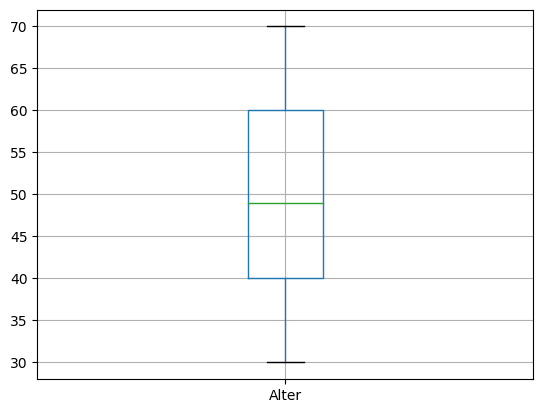

In [194]:
boxplot_besucher_alter = besucher.boxplot(column = 'Alter')
plt.show()

In [195]:
# sowohl bei describe-Tabelle als auch beim boxplot keine Ausreißer zu erkennen

### 3.3.3.2 Einkommen

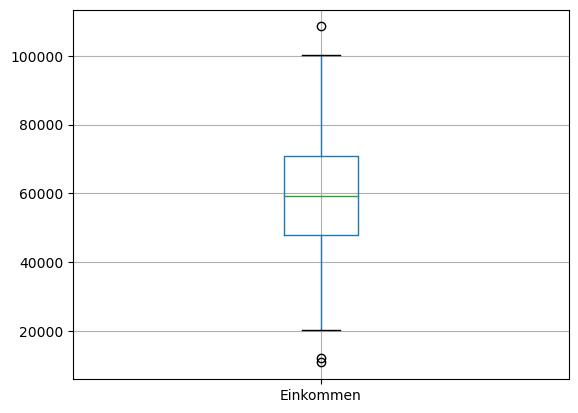

In [196]:
boxplot_besucher_einkommen = besucher.boxplot(column = 'Einkommen')
plt.show()

In [197]:
# mehrere Ausreißer zu erkennen

In [198]:
# Berechnung von Q1, Q3 und IQR der Zeit-Spalte
Q1_einkommen_besucher = besucher['Einkommen'].quantile(0.25)
Q3_einkommen_besucher = besucher['Einkommen'].quantile(0.75)
IQR_einkommen_besucher = Q3_einkommen_besucher - Q1_einkommen_besucher
untere_grenze_einkommen_besucher = Q1_einkommen_besucher - 1.5 * IQR_einkommen_besucher
obere_grenze_einkommen_besucher = Q3_einkommen_besucher + 1.5 * IQR_einkommen_besucher
besucher['Ausreißer'] = (besucher['Einkommen'] < untere_grenze_einkommen_besucher) | (besucher['Einkommen'] > obere_grenze_einkommen_besucher)
ausreißer_einkommen_besucher = besucher.Ausreißer.value_counts()
ausreißer_einkommen_besucher

False    888
True       3
Name: Ausreißer, dtype: int64

In [199]:
# Ermitteln der genauen Werte der Ausreißer
besucher.loc[besucher['Ausreißer'] == True]

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Ausreißer
44,69,108569.0,1,47.0,K1467,True
132,31,12032.0,1,32.0,K1586,True
265,31,10802.0,1,25.0,K1561,True


In [200]:
# so niedriges und so hohes Einkommen ist möglich, daher bleiben Werte erhalten

### 3.3.3.3 Zeit

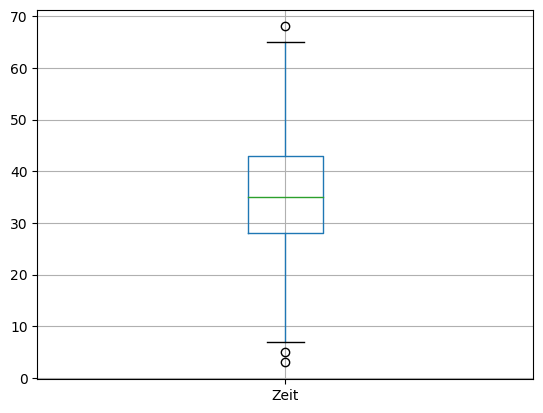

In [201]:
boxplot_besucher_zeit = besucher.boxplot(column = 'Zeit')
plt.show()

In [202]:
# mehrere Ausreißer zu erkennen

In [203]:
# Berechnung von Q1, Q3 und IQR der Zeit-Spalte
Q1_zeit_besucher = besucher['Zeit'].quantile(0.25)
Q3_zeit_besucher = besucher['Zeit'].quantile(0.75)
IQR_zeit_besucher = Q3_zeit_besucher - Q1_zeit_besucher
untere_grenze_zeit_besucher = Q1_zeit_besucher - 1.5 * IQR_zeit_besucher
obere_grenze_zeit_besucher = Q3_zeit_besucher + 1.5 * IQR_zeit_besucher
besucher['Ausreißer'] = (besucher['Zeit'] < untere_grenze_zeit_besucher) | (besucher['Zeit'] > obere_grenze_zeit_besucher)
ausreißer_zeit_besucher = besucher.Ausreißer.value_counts()
ausreißer_zeit_besucher

False    888
True       3
Name: Ausreißer, dtype: int64

In [204]:
# Ermittlung der genauen Werte der Ausreißer
besucher.loc[besucher['Ausreißer'] == True]

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Ausreißer
105,40,39581.0,1,5.0,K1547,True
158,31,38299.0,1,3.0,K1623,True
603,62,84205.0,1,68.0,K1526,True


In [205]:
# so kurze und lange Zeiten sind möglich, daher bleiben Werte erhalten

In [206]:
besucher

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Ausreißer
0,30,39919.0,0,29.0,K1814,False
1,41,53431.0,0,27.0,K1544,False
2,64,73163.0,0,32.0,K1945,False
3,41,36761.0,0,44.0,K1825,False
4,35,42684.0,1,33.0,K1144,False
...,...,...,...,...,...,...
886,32,34392.0,1,48.0,K1211,False
887,41,68516.0,0,34.0,K1375,False
888,65,89685.0,0,23.0,K1965,False
889,68,95714.0,0,32.0,K1540,False


In [207]:
# Boolean-Spalte wieder entfernen

In [208]:
besucher = besucher.drop(besucher.columns[-1], axis=1)
besucher

,Alter,Einkommen,Geschlecht,Zeit,KundeNr
0,30,39919.0,0,29.0,K1814
1,41,53431.0,0,27.0,K1544
2,64,73163.0,0,32.0,K1945
3,41,36761.0,0,44.0,K1825
4,35,42684.0,1,33.0,K1144
...,...,...,...,...,...
886,32,34392.0,1,48.0,K1211
887,41,68516.0,0,34.0,K1375
888,65,89685.0,0,23.0,K1965
889,68,95714.0,0,32.0,K1540


## 4. Geodaten

### 4.1. Geodatei einlesen

In [209]:
geo = pd.read_csv("geo.txt", sep = "\t")
geo.head()

,KundeNr,Niederlassung
0,K0001,Sachsen
1,K0002,NRW
2,K0003,Hessen
3,K0004,Bayern
4,K0005,Bayern


## 4.2 Überblick über Datentypen

In [210]:
geo.dtypes

KundeNr          object
Niederlassung    object
dtype: object

In [211]:
# bei kunden und besucher ist der dypte der KundeNr auch object, daher keine Änderung benötigt

### 4.3 Bereinigung

### 4.3.1 Fehlende Datenpunkte ermitteln und ersetzen

In [212]:
geo.isnull().sum()

KundeNr          0
Niederlassung    0
dtype: int64

### 4.3.2 Ausreißer ermitteln und entfernen/ersetzen

In [213]:
# Übersicht aller Niederlassungen
geo_niederlassung_uniques = geo["Niederlassung"].unique()
print(geo_niederlassung_uniques)

['Sachsen' 'NRW' 'Hessen' 'Bayern' 'Baden-Württemberg'
 'Nordrhein-Westfalen' 'Berlin' 'Niedersachsen' 'Brandenburg' 'Thüringen'
 'Hamburg' 'Düsseldorf' 'Berlin-Charlottenburg' 'Berlin-Mitte' 'BERLIN']


In [214]:
# Bereinigung der Datenpunkte (NRW, Düsseldorf zu Nordrhein-Westfalen), (Berlin-Charlottenburg, Berlin-Mitte, BERLIN zu Berlin)
geo_cleaning = {
    "NRW" : "Nordrhein-Westfalen" , 
    "Berlin-Charlottenburg" : "Berlin" ,
    "Berlin-Mitte" : "Berlin" ,
    "BERLIN" : "Berlin",
    "Düsseldorf" : "Nordrhein-Westfalen"}

geo["Niederlassung"] = geo["Niederlassung"].replace(geo_cleaning, regex = True)

In [215]:
# Überprüfung
geo_niederlassung_uniques2 = geo["Niederlassung"].unique()
print(geo_niederlassung_uniques2)

['Sachsen' 'Nordrhein-Westfalen' 'Hessen' 'Bayern' 'Baden-Württemberg'
 'Berlin' 'Niedersachsen' 'Brandenburg' 'Thüringen' 'Hamburg']


## 5. Zusammenführung der Listen

### 5.1 Kunden und Besucher mit Geo

### 5.1.1 Kunden mit Geo 

In [216]:
kunden_geo = pd.merge(kunden,geo, on = "KundeNr")
kunden_geo

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1,43.0,K0310,Bayern
1,54,77644.0,103145.70,1,40.0,K1042,Berlin
2,55,44341.0,80565.16,0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1,51.0,K0467,Thüringen
1100,38,48301.0,64230.98,1,33.0,K0122,Niedersachsen
1101,67,63547.0,103123.57,1,41.0,K1045,Berlin
1102,37,32686.0,49215.87,1,36.0,K1096,Baden-Württemberg


### 5.1.2 Besucher mit Geo

In [217]:
besucher_geo = pd.merge(besucher, geo, on = "KundeNr")
besucher_geo

,Alter,Einkommen,Geschlecht,Zeit,KundeNr,Niederlassung
0,30,39919.0,0,29.0,K1814,Bayern
1,41,53431.0,0,27.0,K1544,Baden-Württemberg
2,64,73163.0,0,32.0,K1945,Baden-Württemberg
3,41,36761.0,0,44.0,K1825,Baden-Württemberg
4,35,42684.0,1,33.0,K1144,Nordrhein-Westfalen
...,...,...,...,...,...,...
886,32,34392.0,1,48.0,K1211,Hessen
887,41,68516.0,0,34.0,K1375,Sachsen
888,65,89685.0,0,23.0,K1965,Bayern
889,68,95714.0,0,32.0,K1540,Bayern


### 5.2 kunden_geo und besucher_geo zu df_final

In [218]:
df_final = pd.concat([kunden_geo, besucher_geo], axis = 0, ignore_index = True)
df_final

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1,43.0,K0310,Bayern
1,54,77644.0,103145.70,1,40.0,K1042,Berlin
2,55,44341.0,80565.16,0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1990,32,34392.0,NaN,1,48.0,K1211,Hessen
1991,41,68516.0,NaN,0,34.0,K1375,Sachsen
1992,65,89685.0,NaN,0,23.0,K1965,Bayern
1993,68,95714.0,NaN,0,32.0,K1540,Bayern


### 5.3 CSV Datei df_final

In [219]:
df_final.to_csv('df_final.csv', index=False)

## 6. Fragen

### Frage 1: Wie viele Autos wurden verkauft?

In [220]:
anzahl_verkaufter_autos = len(kunden_geo)
anzahl_verkaufter_autos

1104

In [221]:
autos_verkauft = kunden_geo.shape[0]
autos_verkauft

1104

In [222]:
# Antwort zu Frage 1: 1104

### Frage 2: Was ist der Höchst-, Mindest- und Durchschnittspreis?

In [223]:
max_preis = kunden_geo["Preis"].max()
min_preis = kunden_geo["Preis"].min()
durchschnitt_preis = kunden_geo["Preis"].mean()

max_preis, min_preis, durchschnitt_preis

(165482.31, 21471.65, 88975.19871376813)

In [224]:
# Antwort zu Frage 2: Höchstpreis = 165.482,31, Mindestpreis = 21.471,65 und Durchschnittspreis = 88.975,20

### Frage 3: Wie hoch war der Gesamtumsatz?

In [225]:
gesamtumsatz = kunden_geo["Preis"].sum()
gesamtumsatz


98228619.38000001

In [226]:
# Antwort zu Frage 3: Gesamtumsatz = 98.228.619,38 

In [227]:
# Formattierung der Werte in EUR 
def form_eur(wert):
    return "{:,.2f}€".format(wert)

max_preis_eur = form_eur(max_preis)
min_preis_eur = form_eur(min_preis)
durchschnitt_preis_eur = form_eur(durchschnitt_preis)
gesamtumsatz_eur = form_eur(gesamtumsatz)
max_preis_eur

'165,482.31€'

In [228]:
# Erstellung einer Preisübersicht
Preisübersicht = pd.DataFrame({
    "Maximaler Verkaufspreis" : [max_preis_eur],
    "Minimaler Verkaufspreis" : [min_preis_eur],
    "Durchschnittspreis" : [durchschnitt_preis_eur],
    "Gesamtumsatz" : [gesamtumsatz_eur]
})
display(Preisübersicht)

,Maximaler Verkaufspreis,Minimaler Verkaufspreis,Durchschnittspreis,Gesamtumsatz
0,"165,482.31€","21,471.65€","88,975.20€","98,228,619.38€"


### Frage 4: Wie viele Autos wurden pro Bundesland verkauft?

In [229]:
autos_pro_bundesland = kunden_geo["Niederlassung"].value_counts()
autos_pro_bundesland


Baden-Württemberg      205
Bayern                 188
Nordrhein-Westfalen    175
Berlin                 126
Hessen                  96
Niedersachsen           96
Sachsen                 89
Thüringen               49
Hamburg                 43
Brandenburg             37
Name: Niederlassung, dtype: int64

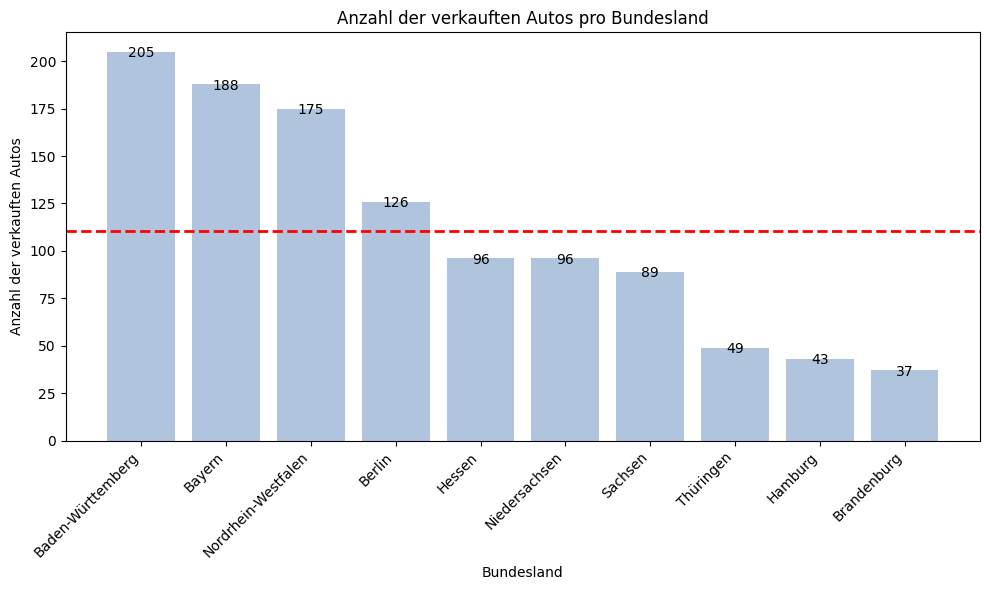

In [230]:
# Erstellen eines Diagramms zur Darstellung
# Dataframe
daten = {"Bundesland" : ["Baden-Württemberg" , "Bayern" , "Nordrhein-Westfalen" , "Berlin" , "Hessen" , "Niedersachsen",
                        "Sachsen" , "Thüringen" , "Hamburg" , "Brandenburg"] , 
        "Verkäufe" : [205 , 188 , 175 , 126 , 96 , 96 , 89 , 49 , 43 , 37]}

df_autos_pro_bundesland = pd.DataFrame(daten)

verkäufe_durchschnitt = df_autos_pro_bundesland["Verkäufe"].mean()

# Diagramm
plt.figure(figsize=(10, 6))
diagramm = plt.bar(df_autos_pro_bundesland["Bundesland"],df_autos_pro_bundesland["Verkäufe"], color="lightsteelblue")
plt.axhline(y=verkäufe_durchschnitt, color='red', linestyle='--', linewidth=2)

for bar in diagramm:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}", ha = "center", va = "center_baseline", fontsize=10)
    
plt.title("Anzahl der verkauften Autos pro Bundesland")
plt.xlabel("Bundesland")
plt.ylabel("Anzahl der verkauften Autos")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [231]:
# Antwort zu Frage 4: siehe Diagramm

### Frage 5: Wie hoch war der durchschnittliche Umsatz (vermutlich ist Preis gemeint) pro Bundesland?

In [232]:
umsatz_pro_bundesland = kunden_geo.groupby("Niederlassung")["Preis"].agg("mean")
umsatz_pro_bundesland = umsatz_pro_bundesland.round(2)
umsatz_pro_bundesland

Niederlassung
Baden-Württemberg      90969.56
Bayern                 89344.31
Berlin                 89584.98
Brandenburg            86673.64
Hamburg                85549.50
Hessen                 85864.93
Niedersachsen          87963.31
Nordrhein-Westfalen    88633.27
Sachsen                89455.08
Thüringen              90816.99
Name: Preis, dtype: float64

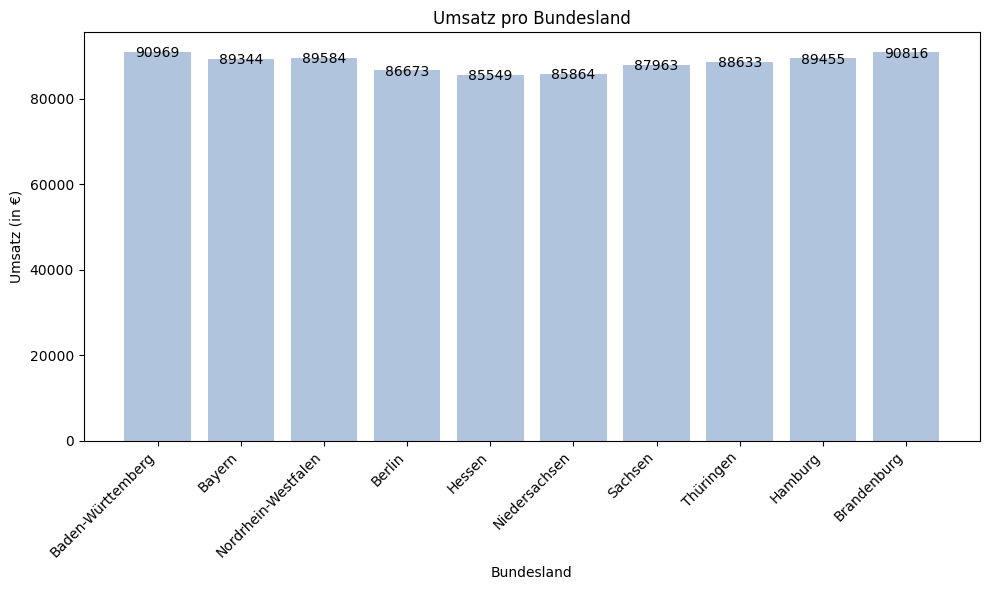

In [233]:
# Erstellen eines Diagramms zur Darstellung
# Dataframe
daten2 = {"Bundesland" : ["Baden-Württemberg" , "Bayern" , "Nordrhein-Westfalen" , "Berlin" , "Hessen" , "Niedersachsen",
                        "Sachsen" , "Thüringen" , "Hamburg" , "Brandenburg"] , 
        "Umsatz" : [90969.56 , 89344.31 , 89584.98 , 86673.64 , 85549.50 , 85864.93 , 87963.31 , 88633.27 , 89455.08 , 90816.99]}

df_umsatz_pro_bundesland = pd.DataFrame(daten2)

# Diagramm
plt.figure(figsize=(10, 6))
diagramm2 = plt.bar(df_umsatz_pro_bundesland["Bundesland"],df_umsatz_pro_bundesland["Umsatz"], color="lightsteelblue")

for bar in diagramm2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}", ha = "center", va = "center_baseline", fontsize=10)

plt.title("Umsatz pro Bundesland")
plt.xlabel("Bundesland")
plt.ylabel("Umsatz (in €)")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


In [234]:
# Antwort zu Frage 5: siehe Diagramm

### Frage 6: In welchem Bundesland wurde das teuerste Auto verkauft?

In [235]:
teuerstes_auto_bundesland = kunden_geo.loc[kunden_geo["Preis"].idxmax()]["Niederlassung"]
teuerstes_auto_bundesland

'Niedersachsen'

In [236]:
# Antwort zu Frage 6: Das teuerste Auto wurde in Niedersachsen verkauft

### Frage 7: Haben mehr Frauen oder Männer unsere Autos gekauft?

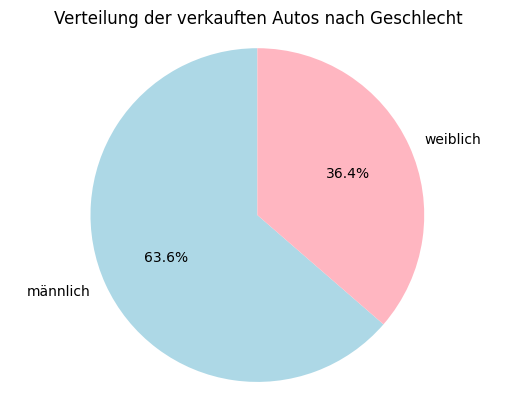

In [237]:
geschlecht_vergleich = kunden_geo["Geschlecht"].value_counts()

labels = ["männlich", "weiblich"]
sizes = [700,400]
colors = ["lightblue","lightpink"]
plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.1f%%", startangle = 90)
plt.axis("equal")
plt.title("Verteilung der verkauften Autos nach Geschlecht")
plt.show()


In [238]:
# Antwort zu Frage 7: Es haben mehr Männer unsere Autos gekauft

### Frage 8: Wie hoch ist das Durchschnittsalter unserer Kunden? Wie hoch ist das Durchschnittsalter unserer Besucher?

In [239]:
durchschnittsalter_kunden = kunden_geo["Alter"].mean()
durchschnittsalter_besucher = besucher_geo["Alter"].mean()

durchschnittsalter_kunden, durchschnittsalter_besucher

(50.375, 49.88103254769921)

In [240]:
# Antwort zu Frage 8: Das Durchschnittsalter unserer Kunden ist 50,38 Jahre und das Durchschnittsalter unserer Besucher ist 49,88 Jahre

### Frage 9: Wie hoch ist das Durchschnittseinkommen unserer Kunden? Wie hoch ist das Durchschnittseinkommen unserer Besucher?

In [241]:
durchschnittseinkommen_kunden = kunden_geo["Einkommen"].mean()
durchschnittseinkommen_besucher = besucher_geo["Einkommen"].mean()

durchschnittseinkommen_kunden, durchschnittseinkommen_besucher


(58850.907608695656, 59367.93265993266)

In [242]:
# Antwort zu Frage 9: Das Durchschnittseinkommen unserer Kunden ist 58.850,91 und das Durchschnittseinkommen unserer Besucher ist 59.367,93

### Frage 10: Gibt es einen statistisch signifikanten Unterschied zwischen dem Durchschnittseinkommen der Kunden und dem der Besucher?

In [243]:
# H0:μ_kunden = μ_besucher
# H1:μ_kunden != μ_besucher
# α = 0.05

stats.ttest_ind(kunden_geo["Einkommen"], besucher_geo["Einkommen"], equal_var = True) # Version Nici


t_stat, p_val = stats.ttest_ind(kunden_geo["Einkommen"].dropna(), besucher_geo["Einkommen"].dropna(), equal_var=False)
t_stat, p_val

# Teststatistik = -0.7035, p-Wert = 0.4818
# Da p-Wert > α , kann die H0 nicht abgelehnt werden. Es liegen nicht genügende Anhaltspunkte vor, dass das Durchschnittseinkommen der Besucher und Kunden unterschiedlich ist

(-0.7047786382342843, 0.4810335763152168)

### Frage 11: Pearson-Korrelations-Koeffizient zwischen den Variablen Alter, Einkommen, Preis und Zeit

In [244]:
ausgewählte_spalten = ["Alter", "Einkommen", "Preis", "Zeit"]
korrelations_matrix = kunden_geo[ausgewählte_spalten].corr(method = 'pearson')

sns.heatmap(korrelations_matrix, annot = True, cmap = "coolwarm", linewidth = 1)
plt.title = "Korrelationsmatrix"
plt.show()

<class 'NameError'>: name 'sns' is not defined

### Frage 12: ist die Variable Zeit approximativ normalverteilt? (qq-Plot)

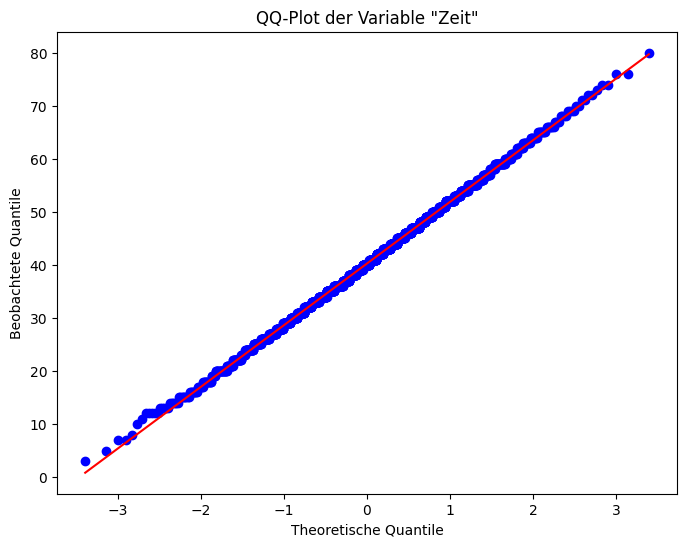

In [245]:
zeit = df_final["Zeit"]

# qq-Plot erstellen:
plt.figure(figsize = (8, 6))
stats.probplot(zeit, dist="norm", plot=plt)
plt.title('QQ-Plot der Variable "Zeit"')
plt.xlabel('Theoretische Quantile')
plt.ylabel('Beobachtete Quantile')
plt.show()
# da die Punkte entlang einer geraden Linie verlaufen kann davon ausgegangen werden, dass die Daten approvimativ normalverteilt sind

### Frage 13: Wie viele Kunden haben keinen Bankkredit aufgenommen, um ein Auto zu kaufen? Also wie viele Kunden haben ein Jahreseinkommen, das über dem Autopreis liegt?

In [246]:
bedingung_einkommen_größer_preis = kunden_geo["Einkommen"] > kunden_geo["Preis"]
count_einkommen_größer_preis = bedingung_einkommen_größer_preis.sum()
count_einkommen_größer_preis
# 5 Kunden haben keinen Kredit aufnehmen müssen, um das Auto zu kaufen

5

### 14: welche sozioökonomischen Merkmale beeinflussen den Kaufpreis? Schätzen Sie eine Regression.

In [247]:
# unabhängige Variablen: Alter, Einkommen, Geschlecht
# abhängige Variable: Preis

y_kunden = kunden_geo["Preis"]

X_kunden = kunden_geo[['Alter', 'Einkommen', 'Geschlecht']]

X_kunden = sm.add_constant(X_kunden)  # Konstante für den Intercept
                
model_kunden = sm.OLS(y_kunden, X_kunden).fit()
model_kunden.summary()
# Regression: Preis = 692.5659 +499.5016*Alter +1.0485*Einkommen + 2214.9438*Geschlecht
# alle drei Faktoren haben einen statistischen Einfluss auf den Preis

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Preis   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1692.
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:18:29   Log-Likelihood:                -11770.
No. Observations:                1104   AIC:                         2.355e+04
Df Residuals:                    1100   BIC:                         2.357e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        692.5659   1416.702      0.489      0.625   -2087.177    3472.308
Alter        499.5016     40.136     12.445      0.000     420.750     578.253
Einkommen      1.0485      0.029     35.925      0.000       0.991       1.106
Geschlecht  2214.9438    648.591      3.415      0.001     942.328    3487.559
==============================================================================
Omnibus:                       40.847   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.427
Skew:                           0.244   Prob(JB):                     5.66e-18
Kurtosis:                       4.220   Cond. No.                     2.81e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 15: Prognose des Kaufpreises für 32-jährigen männlichen Kunden mit Einkommen von 30 000 Euro. Prognose des Kaufpreises für einen männlichen Kunden von 51 Jahren und Einkommen von 54 000 Euro.

In [248]:
X_predict_kunden = pd.DataFrame({
    'Alter': [32, 51],
    'Einkommen': [30000, 54000],
    'Geschlecht': [1,1]
})

X_predict_kunden = sm.add_constant(X_predict_kunden, has_constant='add')

prediction_kunden = model_kunden.predict(X_predict_kunden)

prediction_kunden
# Das Modell schätzt den Kaufpreis eines 32-jährigen männlichen Kundens mit Einkommen von 30 000 Euro auf 50345.86 Euro
# Das Modell schätzt den Kaufpreis eines 51-jährigen männlichen Kundens mit Einkommen von 54 000 Euro auf 84999.83 Euro



0    50345.858611
1    84999.827319
dtype: float64

### 16: Welche Variable beeinflusst den Autopreis am meisten? Vergleichbarkeit der Regressionskoeffizienten durch logistische Regression.

In [260]:
# unabhängige Variablen: Alter, Einkommen, Geschlecht
# abhängige Variable: Preis

# Standardisierung
X_stand = kunden_geo[['Alter', 'Einkommen', 'Geschlecht', "Preis"]]
Standard = X_stand.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)

# Regression
regression = 'Preis ~ Alter + Einkommen + Geschlecht' 
result = smf.ols(regression, data=Standard).fit()

# Betas 
round(result.params, 6)

# Den meisten Einfluss auf den Autopreis hat das Einkommen mit einem Beta von rund 0,7.


Intercept    -0.000000
Alter         0.244021
Einkommen     0.704733
Geschlecht    0.043492
dtype: float64

### 17: Schätzen Sie eine Regression, die die Wahrscheinlichkeit des Kaufs eines Autos ermittelt

In [261]:
# spalte einfügen, ob Kunde = 1 oder Besucher = 0
kunden_geo['Kauf'] = 1
besucher_geo['Kauf'] = 0

# Besucher unter Kunden anfügen
daten_alle = pd.concat([kunden_geo, besucher_geo])

# Überprüfung ob Käufer = 1 und Besucher = 0
daten_alle

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung,Kauf
0,64,66894.0,88160.31,1,43.0,K0310,Bayern,1
1,54,77644.0,103145.70,1,40.0,K1042,Berlin,1
2,55,44341.0,80565.16,0,37.0,K0382,Baden-Württemberg,1
3,49,67271.0,83949.89,0,42.0,K0498,Bayern,1
4,46,49832.0,93781.58,0,41.0,K0552,Hessen,1
...,...,...,...,...,...,...,...,...
886,32,34392.0,NaN,1,48.0,K1211,Hessen,0
887,41,68516.0,NaN,0,34.0,K1375,Sachsen,0
888,65,89685.0,NaN,0,23.0,K1965,Bayern,0
889,68,95714.0,NaN,0,32.0,K1540,Bayern,0


In [262]:
# Regression
y_lg = daten_alle["Kauf"]

X_lg = daten_alle[['Alter', 'Einkommen', 'Geschlecht', 'Zeit']]

X_lg = sm.add_constant(X_lg)

model_lg = sm.Logit(y_lg, X_lg).fit()

print(model_lg.summary())

Optimization terminated successfully.
         Current function value: 0.578825
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Kauf   No. Observations:                 1995
Model:                          Logit   Df Residuals:                     1990
Method:                           MLE   Df Model:                            4
Date:                Wed, 26 Jun 2024   Pseudo R-squ.:                  0.1580
Time:                        06:28:22   Log-Likelihood:                -1154.8
converged:                       True   LL-Null:                       -1371.4
Covariance Type:            nonrobust   LLR p-value:                 1.715e-92
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4360      0.264     -9.242      0.000      -2.953      -1.919
Alter          0.0183      0.

### 18. Wie hoch ist die Wahrscheinlichkeit, dass Person x,y unser Auto kauft?

In [270]:
# Kundendaten
Person_x = [1, 32, 30000, 1, 30]  # Kauf (1 = Kauf), Alter, Einkommen, Geschlecht (1 = männlich), Zeit 
Person_y = [1, 51, 54000, 1, 45] 

# Modell
params = model_lg.params

# Person X
log_1 = np.dot(params, Person_x)
wahrscheinlichkeit_person_x = 1 / (1 + np.exp(-log_1))

# Person Y 
log_2 = np.dot(params, Person_y)
wahrscheinlichkeit_person_y = 1 / (1 + np.exp(-log_2))

print(wahrscheinlichkeit_person_x)
print(wahrscheinlichkeit_person_y)

0.5465430448696998
0.7404466545605674


### 19. Auf welche Probleme sind Sie bei der Zusammenführung des Datensatzes gestoßen? Stellen Sie die Operationen vor, die Sie zum Zusammenführen und Bereinigen der Daten durchgeführt haben

In [ ]:
# 1. Fehlende Daten in Kundendatei für Geschlecht

# Herausgefunden mit der Operation isnull().sum: zeigt die Werte mit "NaN", also wo keine Angaben sind
# Ermittlung des Modalwerts mit kunden["Geschlecht"].mode(): gibt den Modelwert des Geschlechts an
# Ersetzen der fehlenden Werte mit Modalwert mit .fillna(): setzt einen Wert für "NaN" ein, bei uns den Modalwert